# Particle Tracking Code Part Two

This second part of the code takes all the MSDs you found and SAVED from part one and averages them. Plots all the averaged MSDs vs time on the same plot for each of the frame rates you tried for ONE sample. Ex. If you took videos of a sample at 11fps, 29fps, and 40fps, you will get a plot with three different lines.

In [4]:
#importing the required modules
import numpy as np #Numerical Python
import scipy #Scientific Python

%matplotlib inline

import mpld3 #For making nice looking plots
#If mpld3 is not available, install with conda (run "conda install mpld3" in Anaconda
# command prompt)

mpld3.enable_notebook()
import matplotlib
from matplotlib import pylab

#For making interactive user interfaces (buttons and sliders and such)
import ipywidgets as widgets
from ipywidgets import Layout, interact, fixed

#Loading the particle tracking software
import sys
##MAC
sys.path.append("..//track") #Locate code
##PC
# sys.path.append("..\\track")
import mpretrack #The file mpretrack.py and trackmem.py should be in the location above
import trackmem
import bpass
import tiff_file #Ignore any warnings importing this may cause
import pickle
import os

In [5]:
#Now let's locate the data
##MAC 
#data_directory = "//Volumes//USB DISK//60fps_2//" #Notice the double slashes!

##PC
data_directory = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_09\\"
data_file = data_directory.split('\\')[-2]+"_MMStack_Pos0.ome.tif"

# Finding the inital diffusion coefficient

In [7]:
# for each frame rate (10, 29, 40)
#     for each msd
#         add this to all the other msds
#     get the average of the msds
#     plot the average msd v time
#     save the plot
#     log log plot
#     save the plot
#     find the D
#     find the Alpha
#     save these in a file
filecount = len([i for i in os.listdir(data_directory) if os.path.isdir(i)]) ##number of frame rates taken(ex3)
for a in range (0,filecount): ##for each frame rate
    foldername = os.listdir(data_directory)[a] ##10fps, 29fps, 40fps etc.
    directory2 = data_directory+foldername+"\\MSD" ##"Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_09\\MSD"
    msdcount = len([j for j in os.listdir(directory2) if os.path.isdir(j)]) ##finds the number of MSD tracks
    
    for b in range (0, msdcount):
        msdfilename = os.listdir(directory2)[b] ##2018_07_09_40fps_1msd.p,2018_07_09_40fps_2msd.p, etc...
        msdfilepath = directory2 + "\\" + msdfilename
        f = open(msdfilepath,'rb')
        if (b==0):
            msd0 = pickle.load(f)
        elif(b ==1):
            msd1 = pickle.load(f)
        elif (b ==2):
            msd2 = pickle.load(f)
        elif (b ==3):
            msd3 = pickle.load(f)
        f.close()
      ##shorten this code later...
    
    ##add em together...but theyre not equal lengths so you cant just divide. figure this out later.
    if(b==0):
        listoflen = [len(msd0)]##this might be a problem if we dont have an msd3 so ill do an if and figure out how to shorten this later
        listoflen = listoflen.sort()
        total = msd0
    elif (b ==1):
        listoflen = [len(msd0),len(msd1)]
        listoflen = listoflen.sort()
        total = msd0 + msd1
    elif (b ==2):
        listoflen = [len(msd0),len(msd1),len(msd2)]
        listoflen = listoflen.sort()
        total = msd0 + msd1+ msd2
    elif (b ==3):
        listoflen = [len(msd0),len(msd1),len(msd2),len(msd3)]
        listoflen = listoflen.sort()
        total = msd0 + msd1+ msd2
    averagemsd[0:listoflen[0]]

OSError: [Errno 2] No such file or directory: 'Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_09\\'

In [6]:
## Getting different diffusion coefficients for different time ranges 
## (0 to 5s, 0 to 10s, 10 to 50s, this is what sylas does)
mpld3.enable_notebook()

cutoff_start =[0,5,5,10]
cutoff_stop = [5,10,14,25]
DiffusionCoeffs = np.empty(len(cutoff_start))
AlphaValues = np.empty(len(cutoff_start))

for p in range(0, len(cutoff_start)):
    start = cutoff_start[p]
    stop = cutoff_stop[p]
   
    x = np.where(times >= start) ## returns indices
    y = np.where(times < stop) ## returns indices
    z = x[0][0]
    zz = y[0][(np.shape(y)[1]-1)]
    K = np.linspace(z,zz,zz-z+1)
    K = K.astype(int)
    
    pylab.loglog(times, msd,'ro') #Plot mean-squared displacement versus time with red filled circles
    linear_fit = np.polyfit(times[K][4:], msd[K][4:],1) #fit to polynomial of order 1 (i.e., a line)
    values_from_fit = np.polyval(linear_fit, np.hstack((np.array([0]),times[K]))) #evaluate polynomial
    pylab.loglog(np.hstack((np.array([0]),times[K])), values_from_fit,
             '-k', lw=6, alpha= .2*(p+1), label = r"Slope of %.2f microns^2/s" % linear_fit[0])
   
    print str(start)+'s to ' + str(stop) + 's'
   # print "Estimate of localization error: %.4f microns" % abs(linear_fit[1])**0.5  ##not sure what this is...is it correct?
    print "Found diffusion coeff D = %.4f (microns^2/s)" % (0.25*linear_fit[0])
    DiffusionCoeffs[p]=0.25*linear_fit[0]
    
    abc = np.where(times < stop)
    efg = np.where(times >= start)
    end = abc[0][-1]
    begin = efg[0][0]
    if (begin < 4):
        begin = 4
        logtimes = np.log(times[begin:end])
        logmsd = np.log(msd[begin:end])
        fit = np.polyfit(logtimes,logmsd,1)
        alphapower = fit[0]
        logx = fit[1]
        k= np.exp(logx)
        print "Alpha value: %.4f " % alphapower
        print "Coefficient value: %.3f " % k
    else:
        logtimes = np.log(times[begin:end])
        logmsd = np.log(msd[begin:end])
        fit = np.polyfit(logtimes,logmsd,1)
        alphapower = fit[0]
        logx = fit[1]
        k= np.exp(logx)
        print "Alpha value: %.4f " % alphapower
        print "Coefficient value: %.3f " % k
       
    AlphaValues[p]= alphapower
    print ("----------------")
pylab.legend() #puts the 'label' on the plot
pylab.xlabel('Time (s)');
pylab.ylabel('MSD (microns^2)');
   
pylab.savefig(data_directory+'LogLogPlot.png')  

NameError: name 'times' is not defined

In [285]:

#Some parameters...
kb = 1.38065e-23  #Boltzmann's constant
t = 298 #temperature in Kelvin
viscosity = 1.002e-3 #8.9e-4 # 1.002 mPa*s
radius = .5e-6
diffusion_coeff = (kb*t)/(6*np.pi*viscosity*radius)*1e6*1e6
est_radius = (kb*t)/(6*np.pi*viscosity*0.25*linear_fit[0]*1e-12)
print "Theoretical D : %.10f" %diffusion_coeff
print "Estimated radius (in nanometers): %.3f nm" % (est_radius*1e9)
print "Estimated diameter (in micrometer): %.3f um" % (est_radius*1e6*2)

Theoretical D : 0.4356733673
Estimated radius (in nanometers): 45590.417 nm
Estimated diameter (in micrometer): 91.181 um


In [27]:
pickle.dump(DiffusionCoeffs, open(data_directory + '\\D.p', 'wb'))
pickle.dump(AlphaValues, open(data_directory + '\\AlphaValues.p', 'wb'))

0s to 5s
Found diffusion coeff D = 0.0175 (microns^2/s)
Alpha value: 0.3546 
Coefficient value: 0.320 
----------------
0s to 10s
Found diffusion coeff D = 0.0135 (microns^2/s)
Alpha value: 0.3782 
Coefficient value: 0.317 
----------------
10s to 50s
Found diffusion coeff D = 0.0059 (microns^2/s)
Alpha value: 0.5010 
Coefficient value: 0.273 
----------------
0s to 50s
Found diffusion coeff D = 0.0076 (microns^2/s)
Alpha value: 0.4865 
Coefficient value: 0.284 
----------------


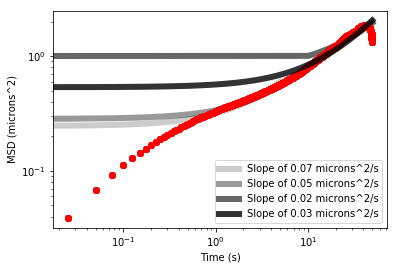

In [85]:
## Getting different diffusion coefficients for different time ranges 
## (0 to 5s, 0 to 10s, 10 to 50s, this is what sylas does)
mpld3.enable_notebook()

cutoff_start =[0,0,10,0]
cutoff_stop = [5,10,50,50]
DiffusionCoeffs = np.empty(len(cutoff_start))
AlphaValues = np.empty(len(cutoff_start))

for p in range(0, len(cutoff_start)):
    start = cutoff_start[p]
    stop = cutoff_stop[p]
   
    x = np.where(times >= start) ## returns indices
    y = np.where(times < stop) ## returns indices
    z = x[0][0]
    zz = y[0][(np.shape(y)[1]-1)]
    K = np.linspace(z,zz,zz-z+1)
    K = K.astype(int)
    
    pylab.loglog(times, msd,'ro') #Plot mean-squared displacement versus time with red filled circles
    linear_fit = np.polyfit(times[K][4:], msd[K][4:],1) #fit to polynomial of order 1 (i.e., a line)
    values_from_fit = np.polyval(linear_fit, np.hstack((np.array([0]),times[K]))) #evaluate polynomial
    pylab.loglog(np.hstack((np.array([0]),times[K])), values_from_fit,
             '-k', lw=6, alpha= .2*(p+1), label = r"Slope of %.2f microns^2/s" % linear_fit[0])
   
    print str(start)+'s to ' + str(stop) + 's'
   # print "Estimate of localization error: %.4f microns" % abs(linear_fit[1])**0.5  ##not sure what this is...is it correct?
    print "Found diffusion coeff D = %.4f (microns^2/s)" % (0.25*linear_fit[0])
    DiffusionCoeffs[p]=0.25*linear_fit[0]
    
    abc = np.where(times < stop)
    efg = np.where(times >= start)
    end = abc[0][-1]
    begin = efg[0][0]
    if (begin < 4):
        begin = 4
        logtimes = np.log(times[begin:end])
        logmsd = np.log(msd[begin:end])
        fit = np.polyfit(logtimes,logmsd,1)
        alphapower = fit[0]
        logx = fit[1]
        k= np.exp(logx)
        print "Alpha value: %.4f " % alphapower
        print "Coefficient value: %.3f " % k
    else:
        logtimes = np.log(times[begin:end])
        logmsd = np.log(msd[begin:end])
        fit = np.polyfit(logtimes,logmsd,1)
        alphapower = fit[0]
        logx = fit[1]
        k= np.exp(logx)
        print "Alpha value: %.4f " % alphapower
        print "Coefficient value: %.3f " % k
       
    AlphaValues[p]= alphapower
    print ("----------------")
pylab.legend() #puts the 'label' on the plot
pylab.xlabel('Time (s)');
pylab.ylabel('MSD (microns^2)');
   
pylab.savefig(data_directory+'Plot.png')  

In [86]:
print "Estimate of localization error: %.4f microns" % abs(linear_fit[1])**0.5  ##
print "Found diffusion coeff D = %.4f (microns^2/s)" % (0.25*linear_fit[0])

Estimate of localization error: 0.7320 microns
Found diffusion coeff D = 0.0076 (microns^2/s)


In [83]:
#Some parameters...
kb = 1.38065e-23  #Boltzmann's constant
t = 298 #temperature in Kelvin
viscosity = 1.002e-3 #8.9e-4 # 1.002 mPa*s
radius = .5e-6
diffusion_coeff = (kb*t)/(6*np.pi*viscosity*radius)*1e6*1e6
est_radius = (kb*t)/(6*np.pi*viscosity*0.25*linear_fit[0]*1e-12)
print "Theoretical D : %.10f" %diffusion_coeff
print "Esimated radius (in nanometers): %.3f nm" % (est_radius*1e9)
print "Esimated diameter (in micrometer): %.3f um" % (est_radius*1e6*2)

Theoretical D : 0.4356733673
Esimated radius (in nanometers): 5490.410 nm
Esimated diameter (in micrometer): 10.981 um


In [312]:
new_feat_size=9
mt, mrej = mpretrack.test(data_directory,data_file,frame_num,new_feat_size,
                          masscut = 100, Imin=100, barI = 200, barRg = 80,
                          barCc = None, IdivRg=1.0, verbose=True)
mt = mpretrack.run(data_directory,data_file,500,new_feat_size,
                   masscut = 100, Imin=100, barI = 200, barRg = 80,
                   barCc = None, IdivRg=1.0, verbose=False)
### Tracking with fancytrack:
num_dimensions = 2 #We take 2-dimensional images
max_displacement = 3 #Maximum displacement between consecutive frames to count as same particle
goodenough = 20 #Minimum length for trajectory
memory = 1 #how many consecutive frames a feature is allowed to skip. 
tracks_v2 = trackmem.trackmem(mt, max_displacement, num_dimensions, goodenough, 2)


-----------TEST-----------


KeyboardInterrupt: 

In [ ]:
%matplotlib inline
mpld3.disable_notebook() #with mpld3, the zoom function for inline plots is available
frame1_image = tiff_file.imread(data_directory+data_file,key=1)
frameLast_image = tiff_file.imread(data_directory+data_file,key=-1)
if False:
    pylab.matshow(np.flipud(frame1_image), cmap=matplotlib.cm.gray) #not sure why I need the flipud but seem to
else:
    pylab.matshow(frame1_image, cmap=matplotlib.cm.gray)
w = np.where(tracks_v2[:,7]==39)
pylab.plot(tracks_v2[w[0],0],tracks_v2[w[0],1],'-y',lw=2)
w = np.where(tracks_v2[:,7]==24)
pylab.plot(tracks_v2[w[0],0],tracks_v2[w[0],1],'-y',lw=2)
w = np.where(tracks_v2[:,7]==20)
pylab.plot(tracks_v2[w[0],0],tracks_v2[w[0],1],'-r',lw=2)




In [ ]:
pylab.subplot(121)
if False:
    pylab.matshow(np.flipud(frame1_image), cmap=matplotlib.cm.gray, fignum=0) #not sure why I need the flipud but seem to
else:
    pylab.matshow(frame1_image, cmap=matplotlib.cm.gray, fignum=0)
w = np.where(tracks_v2[:,7]==39)
pylab.plot(tracks_v2[w[0],0],tracks_v2[w[0],1],'-y',lw=2)
w = np.where(tracks_v2[:,7]==24)
pylab.plot(tracks_v2[w[0],0],tracks_v2[w[0],1],'-y',lw=2)
pylab.xlim(50,61)
pylab.ylim(30,23)
pylab.xticks([])
pylab.yticks([])
pylab.subplot(122)
if False:
    pylab.matshow(np.flipud(frame1_image), cmap=matplotlib.cm.gray, fignum=0) #not sure why I need the flipud but seem to
else:
    pylab.matshow(frame1_image, cmap=matplotlib.cm.gray, fignum=0)
w = np.where(tracks_v2[:,7]==20)
pylab.plot(tracks_v2[w[0],0],tracks_v2[w[0],1],'-r',lw=2)
pylab.xlim(37,43)
pylab.ylim(111,118)
pylab.xticks([])
pylab.yticks([])

In [ ]:
%matplotlib inline
mpld3.enable_notebook() #with mpld3, the zoom function for inline plots is available
frame1_image = tiff_file.imread(data_directory+data_file,key=10)
frameLast_image = tiff_file.imread(data_directory+data_file,key=-1)
if False:
    pylab.matshow(np.flipud(frame1_image), cmap=matplotlib.cm.gray) #not sure why I need the flipud but seem to
else:
    pylab.matshow(frame1_image, cmap=matplotlib.cm.gray)
w = np.where(tracks_v2[:,7]==27)
pylab.plot(tracks_v2[w[0],0],tracks_v2[w[0],1],'-y',lw=2)

In [ ]:
pylab.hist(np.mod(tracks_v2[:,0],1))
pylab.figure()
pylab.hist(np.mod(tracks[:,0],1))
